In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [15]:
#ops.reset_default_graph()
#load data
mnist = load_digits()
print(mnist.keys())

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])


In [16]:
#create features
x = mnist['data']

#create target
y = mnist['target']
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


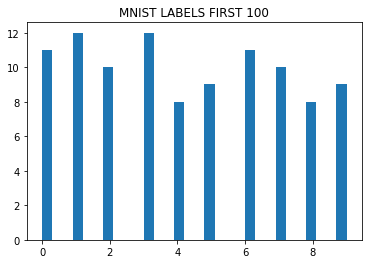

In [18]:
#Create graph session 
sess = tf.Session()
# Set Seed
seed = 3
tf.set_random_seed(seed)
np.random.seed(seed)
plt.hist(mnist['target'][:100],30)
plt.title('MNIST LABELS FIRST 100')
plt.show()


C:\Users\USER\Anaconda3\envs\intuitive-deep-learning\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  
C:\Users\USER\Anaconda3\envs\intuitive-deep-learning\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  import sys


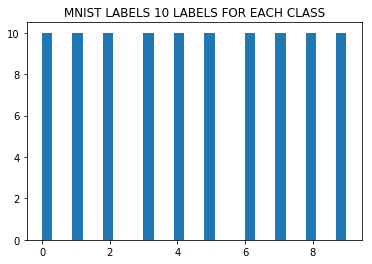

[0 1 2 3 4 5 6 7 8 9]
(100, 10)
(100, 10)


In [22]:
dict1 = {}
dict2 = {}
for i in range(10):
    dict1[i] = x[np.where(mnist['target'] == i)][:10]
    dict2[i] = mnist['target'] [np.where(mnist['target'] == i)][:10]
x_v = np.vstack(i for i in dict1.values())#contains 10 sample images for 10 class
y_v = np.hstack(j for j in dict2.values())

plt.hist(y_v,30)
plt.title('MNIST LABELS 10 LABELS FOR EACH CLASS')
plt.show()


print(np.unique(y))
df = pd.DataFrame({'Labels':y_v})
y_ = pd.get_dummies(df['Labels'])
print(y_.shape)
y = y_.values
print(y.shape)

x_vals_train shape :

(80, 64)
x_vals_test shape :

(20, 64)
y_vals_train shape :

(80, 10)
y_vals_test shape :

(20, 10)


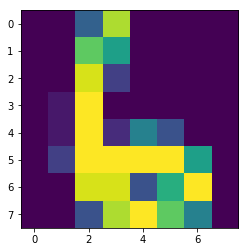

6
[0 0 0 0 0 0 1 0 0 0]


In [23]:
# Split data into train/test = 80%/20%
x_vals_train,x_vals_test,y_vals_train,y_vals_test = train_test_split(x_v,y,test_size=0.2,random_state=1)
#
print('x_vals_train shape :\n')
print(x_vals_train.shape)
#
print('x_vals_test shape :\n')
print(x_vals_test.shape)
#
print('y_vals_train shape :\n')
print(y_vals_train.shape)
#
print('y_vals_test shape :\n')
print(y_vals_test.shape)
#Visualization of shuffled data start
plt.imshow(x_vals_train[10].reshape(8,8))
plt.show()
print(np.argmax(y_vals_train[10]))
print(y_vals_train[10])

In [26]:
#Visualization of shuffled data end
scaler = MinMaxScaler()
x_vals_train = scaler.fit_transform(x_vals_train)
x_vals_test = scaler.fit_transform(x_vals_test)
x_vals_test

array([[0.        , 0.        , 0.6       , ..., 0.73333333, 0.07692308,
        0.        ],
       [0.        , 0.        , 0.73333333, ..., 0.26666667, 0.        ,
        0.        ],
       [0.        , 0.        , 0.6       , ..., 0.53333333, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.2       , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13333333, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.66666667, 0.        ,
        0.        ]])

In [27]:
# Declare batch size
batch_size = 10

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 64], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 10], dtype=tf.float32)

In [28]:
# Create variables for both Neural Network Layers
#single hidden layers
n_nodes_hl1 = 24


A_1 = tf.Variable(tf.random_normal(shape=[64,n_nodes_hl1])) # inputs -> hidden nodes
b_1 = tf.Variable(tf.random_normal(shape=[n_nodes_hl1]))   # one biases for each hidden node
#
A_O = tf.Variable(tf.random_normal(shape=[n_nodes_hl1,10])) # inputs -> hidden nodes
b_O = tf.Variable(tf.random_normal(shape=[10]))   # one biases for each hidden node

Instructions for updating:
Colocations handled automatically by placer.


In [29]:
hidden_output_0 = tf.add(tf.matmul(x_data, A_1), b_1)
hidden_a0_0 = tf.nn.sigmoid(hidden_output_0)

hidden_output = tf.add(tf.matmul(hidden_a0_0, A_O), b_O)
final_output = tf.nn.sigmoid(hidden_output)

#final_output = tf.add(tf.matmul(hidden_output_2, A_O), b_O)

#difference 
diff = tf.subtract(final_output, y_target)
#######################################################

<tf.Tensor 'Sub:0' shape=(?, 10) dtype=float32>

In [30]:
#def derivative of sigmoid function
def sigma(x):
    return tf.div(tf.constant(1.0),tf.add(tf.constant(1.0),tf.exp(tf.negative(x))))
def sigmoidd(x):
    return tf.multiply(sigma(x),tf.subtract(tf.constant(1.0),sigma(x)))

########################################################
#### Back Propagation
'''
d_z_2 = tf.multiply(diff, sigmaprime(z_2))
d_b_2 = d_z_2
d_w_2 = tf.matmul(tf.transpose(a_1), d_z_2)

d_a_1 = tf.matmul(d_z_2, tf.transpose(w_2))
d_z_1 = tf.multiply(d_a_1, sigmaprime(z_1))
d_b_1 = d_z_1
d_w_1 = tf.matmul(tf.transpose(a_0), d_z_1)    
'''

d_hidden_output= tf.multiply(diff,sigmoidd(hidden_output))
d_b_O = d_hidden_output
d_A_O = tf.matmul(tf.transpose(hidden_a0_0),d_hidden_output)

#
d_hidden_a0_0 = tf.matmul(d_hidden_output ,tf.transpose(A_O))
d_hidden_output_0 = tf.multiply(d_hidden_a0_0 ,sigmoidd(hidden_output_0))
d_b_1 = d_hidden_output_0 
d_A_1 = tf.matmul(tf.transpose(x_data),d_hidden_output_0)
print(d_A_1.shape)
print(A_1.shape)
######################################################################
#updating the network
eta = tf.constant(0.5)#learning rate
step = [tf.assign(A_1,tf.subtract(A_1,tf.multiply(eta,d_A_1))),
        tf.assign(b_1,tf.subtract(b_1,tf.multiply(eta,tf.reduce_mean(d_b_1,axis=[0])))),
        tf.assign(A_O,tf.subtract(A_O,tf.multiply(eta,d_A_O))),
        tf.assign(b_O,tf.subtract(b_O,tf.multiply(eta,tf.reduce_mean(d_b_O,axis=[0]))))
]

########################################################
# Declare loss function
'''
loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_target ,logits=final_output))
loss= tf.multiply(diff, loss)

# Declare optimizer
my_opt =  tf.train.GradientDescentOptimizer(0.1)
#my_opt = tf.train.GradientDescentOptimizer(0.001)
train_step = my_opt.minimize(loss)
'''
# Accuracy calculation
correct_prediction = tf.equal(tf.argmax(final_output, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Initialize variables
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

#sess.run(tf.global_variables_initializer())
# Training loop
loss_vec = []
test_loss = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    #rand_y = np.transpose([y_vals_train[rand_index]])
    rand_y = y_vals_train[rand_index]
    #sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    sess.run(step, feed_dict={x_data: rand_x, y_target: rand_y})
    #temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    #loss_vec.append(np.sqrt(temp_loss))
    
    #test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    #test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    #test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%100==0:
        j = i +1
        #print('Generation: ' + str(i+1) + '. Loss_training = ' + str(temp_loss))
        train_accuracy = accuracy.eval(feed_dict={x_data: rand_x, y_target: rand_y})
        print("Step %d, training batch accuracy %g %%"%(j, train_accuracy*100))
       # print('Generation: ' + str(i+1) + '. Loss_test = ' + str(test_temp_loss))
        #test_accuracy = accuracy.eval(feed_dict={x_data: x_vals_test, y_target:np.transpose([y_vals_test])})
        test_accuracy = accuracy.eval(feed_dict={x_data: x_vals_test, y_target:y_vals_test})
        print("Step %d, test batch accuracy %g %%"%(j, test_accuracy*100))


sess.close()

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
(64, 24)
(64, 24)
Step 100, training batch accuracy 100 %
Step 100, test batch accuracy 85 %
Step 200, training batch accuracy 90 %
Step 200, test batch accuracy 95 %
Step 300, training batch accuracy 100 %
Step 300, test batch accuracy 95 %
Step 400, training batch accuracy 100 %
Step 400, test batch accuracy 95 %
Step 500, training batch accuracy 100 %
Step 500, test batch accuracy 100 %
Step 600, training batch accuracy 100 %
Step 600, test batch accuracy 100 %
Step 700, training batch accuracy 100 %
Step 700, test batch accuracy 100 %
Step 800, training batch accuracy 100 %
Step 800, test batch accuracy 100 %
Step 900, training batch accuracy 100 %
Step 900, test batch accuracy 100 %
Step 1000, training batch accuracy 100 %
Step 1000, test batch accuracy 100 %
